In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from keras.optimizers import SGD
from keras.datasets import cifar10

from personal.shallownet import ShallowNet

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


## Train test split on cifar10 dataset

In [2]:
# train and test sets and normalizing our input data
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()
xtrain = xtrain.astype(np.float32) / 255.0
xtest = xtest.astype(np.float32) / 255.0

# one hot encode our class labels
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

print('xtrain shape: {} | ytrain shape: {}'.format(xtrain.shape, ytrain.shape), '\n')
print('xtest shape: {} | ytest shape: {}'.format(xtest.shape, ytest.shape))

xtrain shape: (50000, 32, 32, 3) | ytrain shape: (50000, 10) 

xtest shape: (10000, 32, 32, 3) | ytest shape: (10000, 10)


## Global parameter settings

In [3]:
num_classes = 10
max_epochs = 50
batch_size = 32
learning_rate = 0.01

## Initializing the optimizer and training the network

In [4]:
opt = SGD(lr = learning_rate)

model = ShallowNet.build(width=32, height=32, depth=3, classes=num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=batch_size,
                   epochs=max_epochs, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 128s 3ms/step - loss: 1.8272 - acc: 0.3587 - val_loss: 1.6848 - val_acc: 0.4001
Epoch 2/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5330 - acc: 0.4678 - val_loss: 1.4408 - val_acc: 0.4971
Epoch 3/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.3820 - acc: 0.5152 - val_loss: 1.3666 - val_acc: 0.5163
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3037 - acc: 0.5436 - val_loss: 1.3554 - val_acc: 0.5204
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.2599 - acc: 0.5588 - val_loss: 1.3230 - val_acc: 0.5290
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.2267 - acc: 0.5697 - val_loss: 1.3105 - val_acc: 0.5313
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2002 - acc: 0.5780 - val_loss: 1.2995 - 

## Evaluating the network and classification report

In [18]:
ypred = model.predict(xtest, batch_size=batch_size)

# class label names for cifar10 dataset
label_names = ['airplane', 'automobile', 'bird',
               'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

# classification report
print(classification_report(ytest.argmax(axis=1),
                           ypred.argmax(axis=1),
                           target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.73      0.50      0.60      1000
  automobile       0.72      0.74      0.73      1000
        bird       0.38      0.60      0.47      1000
         cat       0.47      0.42      0.44      1000
        deer       0.50      0.54      0.52      1000
         dog       0.58      0.38      0.46      1000
        frog       0.77      0.58      0.67      1000
       horse       0.62      0.73      0.67      1000
        ship       0.71      0.76      0.74      1000
       truck       0.66      0.73      0.69      1000

   micro avg       0.60      0.60      0.60     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.62      0.60      0.60     10000



## Training loss and accuracy

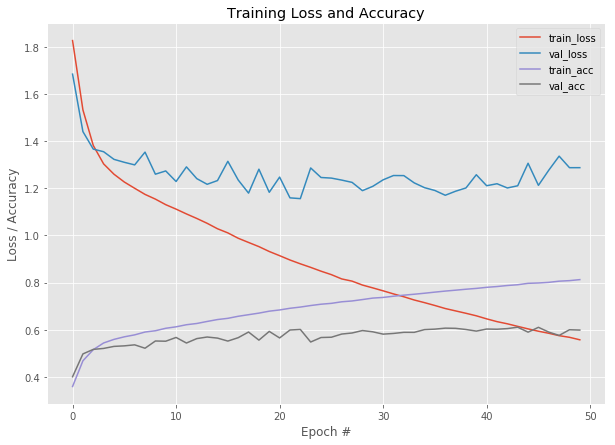

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))

plt.plot(np.arange(max_epochs), history.history['loss'], label='train_loss')
plt.plot(np.arange(max_epochs), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(max_epochs), history.history['acc'], label='train_acc')
plt.plot(np.arange(max_epochs), history.history['val_acc'], label='val_acc')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()